# Lançamento oblíquo e força de arrasto

* PET - Física UFRN
* Petiano: José Emanuel Vasconcelos Oliveira
* Data: 11/04/2025

$\quad$ Neste `Notebook`, estudaremos um dos principais tópicos no estudo da mecânica: lançamento oblíquo. Entretanto, pretendemos trazer aqui uma abordagem mais generalizada e realista. Nosso objetivo aqui é introduzir o conceito de arrasto e simular lançamentos que tenham a interferência desse elemento. Basicamente, estudaremos nesse `Notebook` uma trajetória de projétil sobre a ação da resistência do ar, muitas vezes ignorada. Utilizaremos uma abordagem numérica relatada no livro do Mark Newman [1]. O `Notebook` seguirá a seguinte estrutura:

1. *Introdução;*
2. *Arrasto;*
3. *Exemplos;*
4. *Métodos computacionais;*
5. *Simulações;*
6. *Conclusão.*

## Pré-requisitos

$\quad$ Para este `Notebook`, o leitor não precisa se preocupar com a instalação de bibliotecas, pois usaremos somente algumas padrões, do Python. Entretanto, é interessante entender como funciona a abordagem matemática para a resolução de equações diferenciais ordinárias (EDO's).

### Importando bibliotecas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

### Detalhes das bibliotecas

In [11]:
%load_ext watermark
%watermark -p scipy,numpy,matplotlib

scipy     : 1.15.1
numpy     : 1.26.4
matplotlib: 3.10.0



## 1. Introdução

$\quad$ Um dos principais assuntos da física é a cinemática. Essa ciência estuda o estado e o modo de movimento dos corpos. Em um estudo comum de física básica, nos é apresentada essa seção da mecânica e suas particularidades. Geralmente, vimos conceitos de velocidade, aceleração, função da posição, queda livre e lançamentos. Entretanto, todos esses tópicos são trabalhados considerando uma aceleração constante. Além disso, forçamos também que não há, em momento algum, resistência do ar. 

$\quad$ Durante este `Notebook`, utilizaremos equações diferenciais ordinárias (EDO, usaremos a sigla a partir de agora) para retratar o modo como funcionam as trajetórias de corpos. Elas serão baseadas na soma de forças em cada direção, conforme diz a segunda Lei de Newton. Entretanto, em geral, simplificaremos a massa diretamente, enxugando a notação. Dessa forma, espera-se que o leitor tenha familiaridade para lidar com esse tipo de problema. Estaremos considerando somente movimentos em duas dimensões. Por conveniência, escolheremos o plano $xy$ para trabalharmos. Assim sendo, o sentido positivo do eixo $x$ será para a direita e o do eixo $y$ para cima. Além disso, utilizaremos a notação de Newton para derivadas temporais:  

$$
\frac{dx}{dt} = \dot{x}
$$

$\quad$ Vamos estudar, agora, o lançamento oblíquo, visto em um curso de cinemática. Trataremos deste diretamente, pois, conforme o princípio da superposição, esse caso é a soma de um lançamento horizontal com um vertical, englobando os principais temas da cinemática. Primeiro, vamos definir nosso vetor deslocamento, $\vec{r}(t)$, como um vetor bidimensional, onde cada componente deste é uma função temporal que descreve a posição de cada componente em determinado instante de tempo:

$$
\vec{r}(t) = x(t) \ \hat{i} + y(t) \ \hat{j}.   \tag{1}
$$

$\quad$ Em um lançamento, cujo projétil está sujeito somente à aceleração gravitacional $g$, obtemos o seguinte:

$$
\ddot{\vec{r}} = \ddot{x}\hat{i} + \ddot{y}\hat{j} = 0\ \hat{i} - g \ \hat{j}.  \tag{2}
$$

Note que omitimos o fato das funções serem dependentes do tempo, de modo a enxugar a notação. A equação (2) mostra a aceleração no qual o objeto lançado está exposto. Sabemos que, na direção do eixo $x$ não existe nenhuma força atuando. Enquanto isso, consideramos a ação da força gravitacional na direção do eixo $y$, porém com o sentido para baixo, sendo esse o motivo do sinal negativo. Sendo assim, podemos montar o sistema de EDO:

$$
\begin{aligned}
\ddot{x} = 0 \ \  \\
\ddot{y} = -g . 
\end{aligned}
\tag{3}
$$

$\quad$ A resolução para (3) é bem direta, basta utilizarmos integração elementar. Por ser simples, o passo a passo para esse caso estará no apêndice. Além disso, se o leitor preferir outra abordagem para esse caso, consultar a referência [3]. Finalmente, obtemos uma expressão para o nosso vetor posição na forma:

$$
\vec{r} = (v_0 \cos(\theta) t + x_0) \ \hat{i} + \left(y_0 + v_0 \sin(\theta) t - \frac{gt^2}{2} \right) \ \hat{j} \quad , \quad 0 \leq \theta \leq \pi.
\tag{4}
$$

Onde $v_0$ é o módulo da velocidade inicial de lançamento, $\theta$ o ângulo do lançamento com relação ao eixo $x$ e $x_0$ e $y_0$ as coordenadas iniciais nos eixos $x$ e $y$, respectivamente. Note que limitamos o ângulo no qual o projétil pode ser lançado pois estamos considerando o eixo $x$ como o nível do solo. Dessa forma, o objeto se movimenta pelo ar, sem infiltrar no chão.

## 2. Arrasto

$\quad$ É importante notar que, durante a abordagem anterior, consideramos que não existe uma força dissipativa atuando sobre o corpo. Dessa forma, a única força que está agindo no projétil é a força gravitacional. Entretanto, existe um problema quando fazemos essa consideração. Estamos desprezando a influência de algo tão presente em nosso cotidiano: o ar. Se estivéssemos em uma câmara a vácuo e soltássemos uma bola de ferro e uma pena simultaneamente, ambos tocariam o solo ao mesmo tempo, pois estariam submetidos a uma mesma aceleração. Entretanto, se realizarmos esse experimento em um ambiente normal, veremos que a pena demora muito mais tempo para cair. Por qual motivo isso ocorre? 

$\quad$ A resposta está no modo em que o ar afeta o movimento dos corpos, através da chamada "resistência do ar". Na verdade, essa resistência é uma particularidade de um fenômeno da natureza conhecido como *arrasto*. O arrasto é um tópico muito discutido na mecânica dos fluidos e importantíssimo na engenharia do automobilismo, por exemplo. Não está no escopo deste `Notebook` apresentar o formalismo do estudo de fluidos. Sendo assim, se o leitor se interessar em conhecer a fundo as definições e propriedades de alguns termos aqui mencionados, sugerimos a referência [2].

$\quad$ Agora, vamos buscar entender como funciona o arrasto. Primeiro, vamos imaginar que estamos fazendo o estudo a partir do referencial do objeto que está imerso em um fluido (no caso do lançamento, um projétil no ar).  Assim, consideramos que existe um escoamento desse fluido qualquer em nossa direção. Devido à presença desse objeto, ocorrerão pertubações no escoamento, fazendo surgir uma força resultante com duas componentes: a força de sustentação, perpendicular às linhas de fluxo do escoamento; e a força de arrasto, paralelo ao fluxo. Chamamos de linhas de fluxo (ou corrente), representações esquemáticas do comportamento da trajetória de partículas do fluido. Para continuar com o nosso estudo, precisamos fazer algumas pontuações: 

i) longe do objeto, o fluido está em um regime de escoamento laminar; 

ii) o regime de fluido é permanente; 

iii) o fluido é ideal;

iv) não consideraremos diferenças de altura na determinação das diferenças de pressão. 

$\quad$ A partir dessas considerações, podemos continuar nosso trabalho sem problemas. Note que consideramos um fluido ideal, isto é, não produz tensões de cisalhamento. Dessa forma, todo o arrasto para o nosso caso será devido a diferenças de pressão. Entretanto, em fluidos reais, as tensões também causam arrasto. Apesar disso, a forma com que a solução do nosso problema terá também serve para o caso de fluidos reais. Portanto, os passos a seguir, apesar de tratarem um caso específico, conseguem se estender de forma generalizada facilmente.

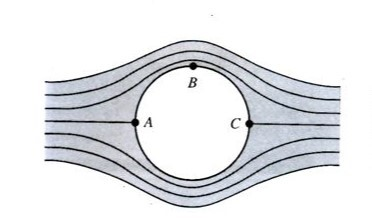 

Figura 1: Representação esquemática de um escoamento de um fluido ideal.

$\quad$ Vamos olhar atentamente para a Figura **1**, pois nos ajudará a entender algumas passagens. Primeiro, consideramos que o fluido esteja se movimentando da esquerda para a direita. Agora, apliquemos o princípio de Bernoulli [2] entre um ponto que esteja longe (chamemos de ponto *L*) e à esquerda do objeto e o ponto *A*. Vamos considerar a velocidade em *L* como sendo a velocidade $v$ do fluido. Ficamos com:

$$
\frac{\rho v^2}{2} + P_L + \rho g z_L = \frac{\rho {v_A}^2}{2} + P_a + \rho g z_A \ ,  \tag{5}
$$

onde $\rho$ é a densidade do fluido, $P$ representa sua densidade, $g$ a aceleração gravitacional e $z$ uma profundidade medida a partir de um nível de referência. É importante perceber que, como mencionado anteriormente, não iremos considerar diferenças de profundidades em nossos cálculos. Além disso, o ponto *A* é conhecido como *ponto de estagnação*, ou seja, a velocidade do fluido neste é nula. Assim, a equação (5) se reduz para:

$$
P_A = P_L + \frac{\rho v^2}{2} \ . \tag{6}
$$

$\quad$ Agora, vamos aplicar a equação de Bernoulli novamente. Entretanto, dessa vez, entre os pontos *L* e *B*. Considerando as afirmações feitas anteriormente, ficamos simplesmente com:

$$
P_B = P_L + \frac{\rho (v^2 - {v_B}^2)}{2} = P_L + \frac{\rho \Delta v^2}{2} \ . \tag{7}
$$

Entretanto, temos que notar que, a área onde o fluido está passando em *B* é menor do que a área no nosso ponto hipotético *L*. Portanto, de acordo com a equação da continuidade [2], $v_B > v$, logo $\Delta v^2 < 0$.

$\quad$ Analisando as equações (6) e (7), podemos perceber um detalhe muito enriquecedor para a nossa discussão. Em (6), o termo somado à pressão no ponto *L* é positivo, indicando que a pressão em *A* é maior. Já em (7), o contrário ocorre. Como $\Delta v^2 < 0$, a pressão em *B* se torna menor que em *L* e, consequentemente, menor que em *A*. É por causa dessas diferenças de pressões que surge uma força resultante sobre o corpo.

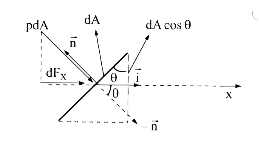

Figura 2. Diagrama de forças para um elemento infinitesimal do fluido. Imagem adaptada de "Mecânica dos Fluidos", de Franco Brunetti.

$\quad$ Vamos analisar a Figura **2** para facilitar a nossa compreensão de como deduzir a força de arrasto. Além disso, lembremos que existe uma expressão para a força em função da pressão, que diz:

$$\vec{dF} = -P \ \vec{n} \ dA \ , \tag{8}$$ 

onde $dA$ representa o diferencial de área, ou seja, a área de um pequeno elemento do fluido e $\vec{n}$ representa o vetor unitário normal ao diferencial de área. 

$\quad$ Note que a equação (8) afirma que a força que age no elemento do fluido tem a mesma direção que o vetor normal, mas com sentido oposto. Porém, discutimos anteriormente que a força de arrasto é aquela paralela às linhas de escoamento em uma seção do fluido longe do objeto. Se voltarmos a nossa atenção rapidamente para a Figura **1** novamente, notaremos então que o arrasto deve ser a componente da força na direção do eixo $x$. Podemos verificar que o módulo da componente $dF_x$ da força resultante pode ser escrito como $dF_x = dF\cos(\theta)$, por trigonometria básica. Podemos escrever que $dA\cos(\theta) = dA_x$. Sendo assim, podemos substituir a pressão pela relação obtida em (7) e calcular a força de arrasto completamente por integração, de modo a obter:

$$
F_x = \int \frac{\rho \Delta v^2}{2} \ dA_x \ . \tag{9}
$$

$\quad$ Perceba que utilizamos um valor levemente diferente para a pressão do o que obtido em (7). Isso acontece, pois estamos interessados somente entre as diferenças de pressão ao redor do corpo, sendo importante apenas o termo referente à varição do quadrado das velocidades. A expressão obtida em (9) geralmente encontra dificuldades com a distribuição da pressão e da diferença de velocidades. Sendo assim, é comum utilizar uma expressão final com uma constante adimensional fazendo o papel de correção numérica. Essa constante é determinada empiricamente e, nesse caso, é denominada de *Coeficiente de arrasto* ($C$). Assim, a expressão para a força de arrasto se torna:

$$
F_a = C \ \frac{\rho A v^2 }{2} \ , \tag{10}
$$

onde $v$ é a velocidade do fluido longe do objeto e $A$ agora se trata, geralmente, da área projetada deste em um plano perpendicular à $v$.

## 3. Exemplos

$\quad$ Agora que temos uma equação consolidada para a força de arrasto, podemos finalmente aplicá-la ao nosso problema de um lançamento oblíquo. Vamos, no entanto, notar primeiramente a natureza vetorial do arrasto. Ao realizarmos nossa demonstração, consideramos um referencial que acompanhava o objeto imerso no fluido. Notamos também que a contribuição do arrasto para a força resultante era a componente paralela à velocidade do fluido. Portanto, podemos aferir que, em um referencial externo, onde o fluido está parado e o objeto se move com velocidade $v$, a força de arrasto tem a mesma direção da velocidade do objeto, porém com um sentido contrário.

$\quad$ Vamos considerar o nosso projétil uma esfera de ferro, perfeitamente lisa. De acordo com [2], o coeficiente de arrasto de uma esfera lisa depende do *Número de Reynolds*. Esta é uma grandeza adimensional muito importante para a mecânica dos fluidos. Em resumo, ele mede o quão turbulento é determinado escoamento de um fluido, devido à viscosidade. A fórmula para determinar esse número é:

$$
Re = \frac{\rho vD}{\mu}, \tag{11}
$$

onde $v$ é a velocidade do objeto em relação ao fluido, $D$ o diâmetro característico do corpo (em casos de objetos esféricos, podemos tratá-lo como o diâmetro da esfera), $\rho$ a densidade do fluido e $\mu$ a viscosidade dinâmica, sendo as últimas duas características intrínsecas ao fluido. O cálculo para o Número de Reynolds e as informações intrínsecas aos fluidos usados neste `Notebook` estão dispostos na referência [5].

$\quad$ Conforme a bibliografia mencionada, quando $Re < 1$, o coeficiente de arrasto se torna $C = \frac{24}{Re}$. Substituindo essa afirmação em (10) , fazendo com que a área de referência seja a de um círculo $\left (A = \frac{\pi D^2}{4} \right)$ e usando a expressão para o Número de Reynolds de (11), ficamos com:

$$
F_a = \frac{24}{Re} \ \frac{\rho A v^2 }{2} = \frac{24 \mu}{\rho v D} \ \frac{\rho v^2 \pi D^2}{8} \Rightarrow F_a = 3 \pi \mu v D. \tag{12}
$$

Essa é uma expressão para força de arrasto válida somente para escoamentos com um Número de Reynolds muito baixo. Escoamentos desse tipo são ditos "lentos" e são mais comuns quando o corpo está imerso em um líquido. 

#### 3.1. Exemplo 1

$\quad$ Com essas informações em mãos, vamos tentar resolver analiticamente, a partir da construção de EDO, o movimento de um corpo em baixa velocidade imerso em um líquido. Para atender os requisitos necessários para obter (12), uma possibilidade para construir o problema seria: uma esfera lisa de ferro com $2 \ mm$ de diâmetro, pesando $ 3,4 \cdot 10^{-2} \ g$, é lançada sob o ângulo de $30 °$ em relação à horizontal a uma velocidade $v = 2 \ cm/s$ em uma banheira de azeite ($Re = 0,45)$. As equações diferenciais que regem o movimento da esfera são:

$$
\begin{aligned}
\ddot{x} = -K \dot{x} \quad \\
\ddot{y} = -K \dot{y} - g \ ,
\end{aligned}
\quad \quad K = \frac{3\pi \mu D}{m}. \tag{13}
$$

Utilizamos a constante $K$ para enxugar a notação. É importante notar que a força de arrasto foi escrita na forma vetorial, ou seja, ela age na mesma direção de cada componente da velocidade, porém em sentido contrário. Fica a cargo do leito verificar que, ao calcular o módulo da força de arrasto em (13), obtemos o resultado expresso em (12). 

$\quad$ O passo a passo para a resolução das equações em (13) estará expresso no apêndice deste `Notebook`. A solução final para a equação de movimento é, então:

$$
\begin{aligned}
\vec{r} = x \ \hat{i} + y \ \hat{j} = \left(\frac{v \cos (30°)}{K} \left(1 - e^{-Kt} \right)\right) \ \hat{i} - \left(\frac{1}{K} \left[\left(v \sin (30°) + \frac{g}{K}\right)e^{-Kt} + gt - \left(v \sin (30°) + \frac{g}{K}\right) \right]  \right) \ \hat{j} \qquad \therefore
\\
\\
\vec{r} =  \left(\left(\frac{\sqrt{3}}{2} \frac{v}{K} \right)\left(1 - e^{-Kt} \right)\right) \ \hat{i} -  \left(\frac{1}{K} \left[\left( \frac{v}{2} + \frac{g}{K}\right)e^{-Kt} + gt - \left(\frac{v}{2} + \frac{g}{K}\right) \right]  \right) \ \hat{j} \ . \qquad \qquad \qquad \qquad
\end{aligned}
\tag{14}
$$

Se o leitor preferir, pode substituir o valor da constante $K$, pelo retratado na equação (13), e da velocidade $v$. As grandezas relacionadas ao fluido são facilmente encontradas em [5].

$\quad$ Comparando (14) com (4), percebemos que a forma do vetor deslocamento, para um caso específico e simples, ao considerar o arrasto, se torna muito mais complicada. O leitor ainda deve lembrar que estamos ignorando a força de sustentação e assumindo uma esfera perfeita e lisa, sendo essas considerações formas de simplificar nosso problema. Quanto mais nos aproximamos da realidade, mais difícil é conseguir criar um modelo bem definido.

#### 3.2. Exemplo 2

$\quad$ Agora, vamos partir para um caso mais complicado. Quando $Re > 1$, a força de arrasto se apresenta unicamente como consta em (10), ou seja, proporcional ao módulo da velocidade ao quadrado. Nas regiões em que $1 < Re < 10^3$, é difícil determinar com precisão o coeficiente de arrasto, necessário para nossos cálculos. Porém, a literatura mostra que para $10^3 < Re < 3,5 \cdot 10^5$, $C$ tem seu valor quase constante em torno de $0,45$. Assim, usaremos um caso de um escoamento com esse Número de Reynolds para embasarmos nosso outro exemplo.

$\quad$ Consideremos uma esfera, perfeitamente lisa. Ela possui $10 \ cm$ de diâmetro e pesa $4 \ kg$. A esfera é lançada em um canhão, que a fornece uma velocidade inicial de $30 \ m/s$ com um ângulo em relação à horizontal de $30°$. A esfera viaja pela atmosfera nas condições normais de temperatura e pressão $\left(Re = 2,03 \cdot 10^5\right)$. Agora, com base em (10), as equações diferenciais que regem o movimento da nossa esfera são:

$$
\begin{aligned}
\ddot{x} = -\frac{\pi D^2 \rho C}{8m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} \quad
\\
\\
\ddot{y} = -g -\frac{\pi D^2 \rho C}{8m} \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} \ .
\end{aligned}
\tag{15}
$$

A forma que a força de arrasto aparece nas componentes se encontra dessa maneira devido à decomposição na forma vetorial da mesma. Se o leitor quiser verificar que o módulo da força continua o mesmo, o procedimento é análogo ao do exemplo 1.

$\quad$ Ao contrário de (13), a equação acima não possui uma resolução analítica. Ou seja, não é possível encontrar uma equação que descreva com perfeição o movimento do projétil. Assim, nossa análise analítica sobre o problema está encerrada. Entretanto, podemos fazer cálculos numéricos de modo a encontrar a trajetória da nossa esfera. É isso que faremos nas seções seguintes. Entretanto, primeiramente, veremos o método que utilizaremos para nosso estudo computacional.

## 4. Métodos computacionais

$\quad$ Para resolver nossos problemas computacionalmente, usaremos ferramentas de resoluções de EDO descritas na referência [1]. Especificamente, neste `Notebook` utilizaremos o método de Runge-Kutta de quarta ordem. Esse algoritmo se baseia na expansão em Série de Taylor em vários pontos da função dentre um intervalo de tempo e fazendo a combinação linear certa dessas expansões, de modo a gerar expressões simples de programar e com boa acurácia. Entretanto, conforme o autor da referência, a demonstração desse método é tediosa e envolve uma álgebra longa. Por isso, não focaremos nossa atenção sobre ela.

$\quad$ Vamos definir uma função $x(t)$ tal que $\dot{x}(t) = f(x,t)$. Evoluímos a nossa função original no tempo a partir das equações:

$$
\begin{aligned}
k_1 = hf(x,t) \qquad \qquad \qquad \\ \\
k_2 = hf\left(x + \frac{k_1}{2}, t +\frac{h}{2} \right) \qquad \quad \\ \\
k_3 = hf\left(x + \frac{k_2}{2}, t +\frac{h}{2} \right) \qquad \quad \\ \\
k_4 = hf\left(x + k_3, t + h \right) \qquad \qquad \\ \\
x(t+h) = x(t) + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right), \\
\end{aligned}
\tag{16}
$$

onde $h$ retrata um intervalo de tempo muito pequeno. Basicamente, esse método permite a evolução temporal de funções a partir de aproximações numéricas do valor da função em um tempo futuro.

$\quad$ Entretanto, o leitor deve ter notado que fazemos a resolução de uma função em que conhecemos sua primeira derivada. Para resolvermos equações que dependam da segunda derivada da função, basta separarmos a equação em duas e resolvermos ambas simultaneamente com o método descrito acima. Como exemplo, para resolvermos a EDO para $y$ na equação (3), faríamos:

$$
\begin{aligned}
\dot{y} = v_y \; \ \\
\dot{v}_y = -g.
\end{aligned}
$$

A partir daí, usaríamos expressões similares às encontradas em (16) e avançaríamos ambas as grandezas simultaneamente em nosso programa.

## 5. Simulações

$\quad$ Agora, utilizaremos os procedimentos vistos na seção anterior para buscarmos resolver numericamente os exemplos 1 e 2. Para o exemplo 1, faremos uma comparação entre o valor obtido usando o método de Runge-Kutta de resolução de EDO e o resultado analítico encontrado. Além disso, em cada gráfico, faremos um comparativo também com lançamentos que desprezem o arrasto.

$\quad$ Começando com o exemplo 1, vamos primeiro definir as constantes utilizadas (estaremos usando as unidades em gramas e centímetros):

In [84]:
g = const.g #Vamos carregar a constante gravitacional da biblioteca e armazená-la em uma variável com nome mais simples
D = 0.2 #Diâmetro da esfera
m = 3.4e-2 #Massa
u = 0.81 #Viscosidade dinâmica do azeite
K = 3*np.pi*D*u/m #Junção das constantes para simplificar a notação
v0 = 2 #Velocidade inicial
theta = 30 *(np.pi/180) #Ângulo de lançamento, transformado em radianos
v0x = v0*np.cos(theta) #Velocidade inicial no eixo x
v0y = v0*np.sin(theta) #Velocidade inicial no eixo y
x0,y0 =0,0 #Posição inicial

$\quad$ Agora, vamos definir uma função que agrupe o sistema de equações diferenciais em um vetor único, que será iterado com o método apresentado:

In [86]:
def f1(r,t):
    x,vx,y,vy = r[0],r[1],r[2],r[3]
    dx = vx
    dvx = -K*vx
    dy = vy
    dvy = -g - K*vy
    return np.array([dx,dvx,dy,dvy])

$\quad$ Definimos uma função para representar o método Runge-Kutta:

In [88]:
def RK4(r,t):
    k1 = h*f1(r,t)
    k2 = h*f1(r+0.5*k1,t+0.5*h)
    k3 = h*f1(r+0.5*k2,t+0.5*h)
    k4 = h*f1(r+k3,t+h)
    return r+(1/6)*(k1+2*k2+2*k3+k4)

In [89]:
#Aqui inserimos as informações iniciais em um vetor
x,y = [],[]
r = np.array([x0,v0x,y0,v0y])

In [90]:
t1,t2 = 0,2 #Tempo inicial e final
N = 10000 #Sub-intervalos de tempo para calcular as iterações
h = (t2-t1)/N #Tamanho temporal do intervalo
tempo = np.linspace(t1,t2,N)

$\quad$ Agora, vamos fazer o comando principal desse programa: um laço de repetição que atualiza o vetor por completo. Em seguida, plotamos o gráfico da trajetória.

In [92]:
for t in tempo:
    x.append(r[0])
    y.append(r[2])
    '''A condicional a seguir é uma maneira de limitar o intervalo de tempo.
    Se considerarmos y=0 como o chão, não faz sentido termos y < 0. Se o intervalo
    de tempo for muito grande, aparecerão os resultados. Portanto, essa condicional
    serve como forma de limitar quando o projétil atinge novamente o nível do solo e para.'''
    if r[2] < 0:
        break
    r=RK4(r, t)

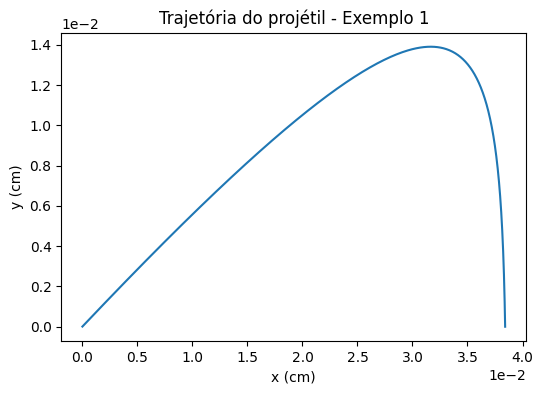

In [93]:
plt.figure(figsize=(6, 4))
plt.plot(x,y)
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title("Trajetória do projétil - Exemplo 1")
plt.show()

$\quad$ Se o leitor já possui um bom conhecimento em cinemática, pode concluir facilmente que essa trajetória se diferencia muito para aquela que sofre apenas influência gravitacional. Para confirmar, vamos apenas retirar o termo relativo ao arrasto. Para isso, basta zerarmos a constante $K$ definida acima, pois é ela quem controla a magnitude do arrasto.

In [95]:
K = 0
x2,y2 = [],[]
r2 = np.array([x0,v0x,y0,v0y])

In [96]:
for t in tempo:
    x2.append(r2[0])
    y2.append(r2[2])
    r2=RK4(r2, t)
    if r2[2] < 0:
        break

$\quad$ Por fim, plotamos um gráfico das duas soluções juntas:

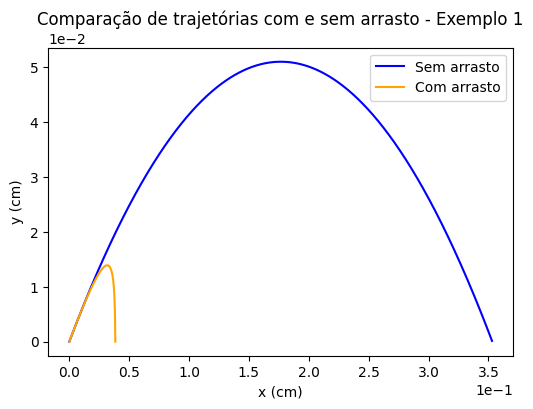

In [98]:
plt.figure(figsize=(6, 4))
plt.plot(x2,y2, color = "blue", label= "Sem arrasto")
plt.plot(x,y, color = "orange", label = "Com arrasto")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.legend(loc="best")
plt.title("Comparação de trajetórias com e sem arrasto - Exemplo 1")
plt.show()

$\quad$ É fácil observar a diferença entre as trajetórias. Se lançássemos a mesma esfera, nas mesmas condições, porém no vácuo, o seu alcance seria pelo menos sete vezes maior. Além disso, note como o movimento influenciado pelo arrasto faz o projétil realizar uma paralisação horizontal muito rapidamente. Esse é um resultado esperado, pois o azeite é um fluido muito denso, logo a pressão que ele exerce (por consequente, o arrasto) é muito alta, freando a esfera rapidamente. Agora, vamos testar a solução analítica encontrada em (14) para compararmos com nossa solução numérica.

In [100]:
#Definimos uma função para representar a fórmula do vetor deslocamento encontrado na nossa solução analítica.
def rteo(t,k):
    x = v0x/k * (1- np.exp(-k*t))
    y = (-1/k)*((v0y+(g/k))*np.exp(-k*t) + g*t - (v0y+(g/k)))
    return np.array([x,y])

In [101]:
#Fazemos vetores nulos para armazenar os dados
xt,yt=[],[]
K = 3*np.pi*D*u/m
#Preenchemos os vetores de maneira adequada
for i in tempo:
    xt.append(rteo(i,K)[0])
    yt.append(rteo(i,K)[1])
    if rteo(i,K)[1] < 0:
        break

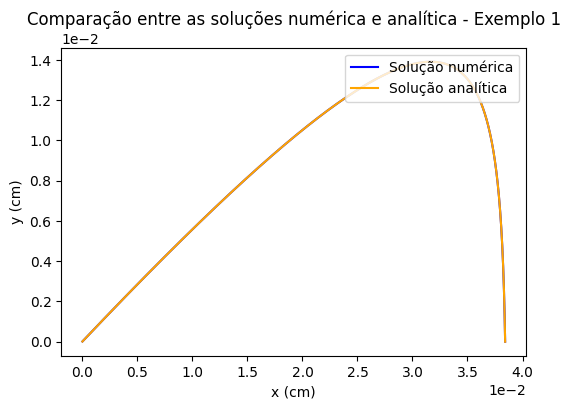

In [102]:
plt.figure(figsize=(6, 4))
plt.plot(x,y, color = "blue", label= "Solução numérica")
plt.plot(xt,yt, color = "orange", label = "Solução analítica")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.legend(loc="upper right")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title("Comparação entre as soluções numérica e analítica - Exemplo 1")
plt.show()

$\quad$ O resultado mostra que as duas curvas se sobrepõem. Isso significa que as duas soluções convergiram perfeitamente, como o esperado. Tal conclusão mostra que o método de resoluções de EDO apresentado em [1] é eficaz.

$\quad$ Agora, finalmente, vamos tentar analisar a trajetória do exemplo 2. Dessa vez, não temos uma solução analítica. Dessa forma, compararemos somente as soluções com e sem arrasto. Vamos fazer o processo análogo ao do exemplo 1, mudando os valores de algumas constantes e nomes de funções e variáveis, para evitar confusão. Além disso, para esse exemplo, usaremos o S.I.

In [105]:
D = 0.1 #Diâmetro da esfera
m = 4 #Massa
rho = 1.22 #Densidade do ar
v0 = 30 #Velocidade inicial
theta = 30 *(np.pi/180) #Ângulo de lançamento, transformado em radianos
C = 0.45 #Coeficiente de arrasto
v0x = v0*np.cos(theta) #Velocidade inicial no eixo x
v0y = v0*np.sin(theta) #Velocidade inicial no eixo y
x0,y0 =0,0

In [106]:
#Definindo a função que monta o sistema de equações diferenciais do exemplo 2
def f2(r,t):
    x,vx,y,vy = r[0],r[1],r[2],r[3]
    a = (np.pi*D**2*rho*C)/(8*m)
    raiz = np.sqrt(vx**2+vy**2)
    dx = vx
    dvx= -a*vx*raiz
    dy = vy
    dvy = -g - (a*vy*raiz)
    return np.array([dx,dvx,dy,dvy])

In [107]:
def RK4(r,t):
    k1 = h*f2(r,t)
    k2 = h*f2(r+0.5*k1,t+0.5*h)
    k3 = h*f2(r+0.5*k2,t+0.5*h)
    k4 = h*f2(r+k3,t+h)
    return r+(1/6)*(k1+2*k2+2*k3+k4)

In [108]:
t1,t2=0,100
N = 10000
h = (t2-t1)/N
tempo = np.linspace(t1,t2,N)

In [109]:
x_e2,y_e2 = [],[]
r_e2 = np.array([x0,v0x,y0,v0y])

In [110]:
for t in tempo:
    x_e2.append(r_e2[0])
    y_e2.append(r_e2[2])
    r_e2=RK4(r_e2, t)
    if r_e2[2] < 0:
        break

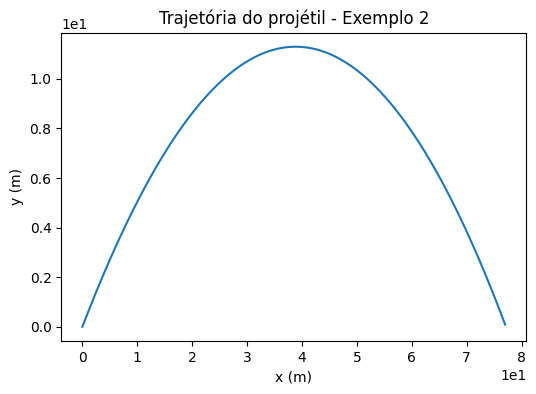

In [111]:
plt.figure(figsize=(6, 4))
plt.plot(x_e2,y_e2)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title("Trajetória do projétil - Exemplo 2")
plt.show()

$\quad$ Novamente, vamos explorar o movimento sem arrasto para comparação. Fazemos isso zerando o coeficiente de arrasto $C$:

In [113]:
C = 0 
x2_e2,y2_e2 = [],[]
r2_e2 = np.array([x0,v0x,y0,v0y])

In [114]:
for t in tempo:
    x2_e2.append(r2_e2[0])
    y2_e2.append(r2_e2[2])
    r2_e2=RK4(r2_e2, t)
    if r2_e2[2] < 0:
        break

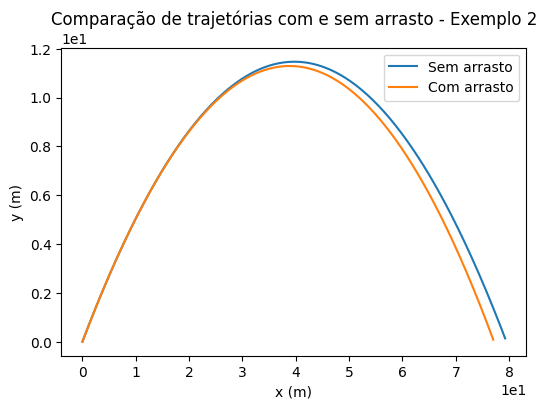

In [115]:
plt.figure(figsize=(6, 4))
plt.plot(x2_e2,y2_e2, label = "Sem arrasto")
plt.plot(x_e2,y_e2, label ="Com arrasto")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(loc="best")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title("Comparação de trajetórias com e sem arrasto - Exemplo 2")
plt.show()

$\quad$ Como é possível observar, existe uma diferença pouco significativa entre as trajetórias com e sem influência do arrasto. Isso acontece, pois o ar é um fluido de densidade baixa, diferente do azeite. Por isso, a influência na trajetória se diferencia tão bruscamente entre os exemplos. Entretanto, se aumentássemos a velocidade do disparo (nenhum canhão lança um projétil a somente $30 \ m/s$) ou mudássemos as características físicas do projétil, poderíamos ver um desvio muito maior entre as trajetórias com e sem arrasto. Outra maneira de ver essa mudança seria, por exemplo, fazer o mesmo lançamento em outro fluido com densidade maior, como o azeite ($Re = 3,4 \cdot 10^4 $):

In [117]:
#Redefinimos o coeficiente de arrasto
C = 0.45
#Mudamos a densidade do meio para a densidade do azeite
rho = 920

In [118]:
x3_e2,y3_e2 = [],[]
r3_e2 = np.array([x0,v0x,y0,v0y])

In [119]:
for t in tempo:
    x3_e2.append(r3_e2[0])
    y3_e2.append(r3_e2[2])
    r3_e2=RK4(r3_e2, t)
    if r3_e2[2] < 0:
        break

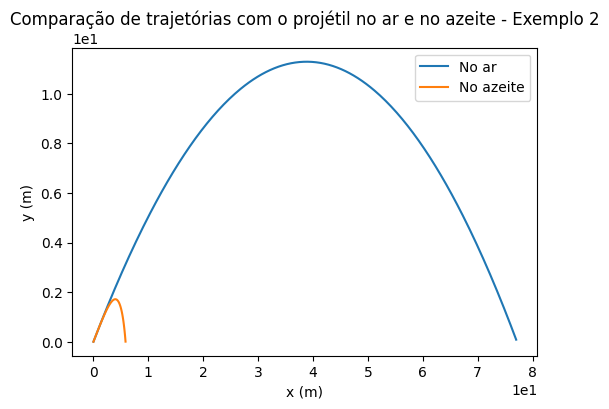

In [120]:
plt.figure(figsize=(6, 4))
plt.plot(x_e2,y_e2, label = "No ar")
plt.plot(x3_e2,y3_e2, label ="No azeite")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(loc="best")
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title("Comparação de trajetórias com o projétil no ar e no azeite - Exemplo 2")
plt.show()

$\quad$ Aqui podemos observar como a densidade do fluido faz diferença no alcançe da trajetória. No ar, o projétil alcançou uma distância cerca de dez vezes maior do que se fosse lançado em uma banheira de azeite. Se a velocidade de lançamento fosse maior, a diferença seria ainda mais exorbitante.

## 6. Conclusão

$\quad$ A partir da total construção deste `Notebook`, podemos entender conceitos fundamentais relacionados à mecânica dos fluidos, forças de arrasto e trajetórias oblíquas. Entretanto, algumas outras análises poderiam ser feitas utilizando as técnicas discutidas aqui. Alguns dos questionamentos que podem ficar são: Como o ângulo influencia na trajetória e alcance do projétil? Se adicionarmos a rotação do objeto, a trajetória muda? A viscosidade do fluido poderia ter mais influência?

$\quad$ Bom, as perguntas são inúmeras. Entretanto, não cabe a esse `Notebook` respondê-las. Algumas das respostas podem ser encontradas em outros `Notebook` desse projeto, que deixamos como referência [6] [7]. Se o leitor buscar se aprofundar em tópicos relacionados à mecânica dos fluidos, recomendamos a referência [2]. Com relação aos nossos resultados, eles se mostraram promissores. Podemos afirmar isso, pois quando era esperado que convergissem, isso aconteceu, assim como quando era esperado uma divergência entre as trajetórias. Portanto, dizemos que o objetivo do `Notebook` foi concluído com êxito.

## 7. Apêndice

$\quad$ Nosso primeiro objetivo é resolver o seguinte sistema de equações lineares presente em (3):

$$
\begin{aligned}
\ddot{x} = 0 \ \  \\
\ddot{y} = -g . 
\end{aligned}
$$

Como não existem dependências cruzadas (equação que dependa de $x$ e $y$, ou suas derivadas, simultaneamente, podemos resolver cada uma separadamente. Em específico, apenas usaremos integração direta. Para a primeira equação, fazemos:

$$
\frac{d^2 x}{dt^2} = 0 \Rightarrow \int \frac{d^2 x}{dt^2} \ dt = \int 0 \ dt \Rightarrow \frac{dx}{dt} = C, \qquad C \  constante
$$

$\quad$ Até então, usamos apenas o Teorema fundamental do Cálculo. Note que a expressão acima diz que a derivada temporal da coordenada $x$ é uma constante. Sabemos que a derivada temporal da posição é a velocidade. Logo, podemos substituir $C$ por $v_x$. Integrando novamente, obtemos:

$$
\int \frac{dx}{dt} \ dt = \int v_x \ dt \Rightarrow x(t) = v_x t + K \ , \qquad K\  constante 
$$

$\quad$ A constante K, resultante da integração pode ser entendida facilmente como a posição inicial da partícula no eixo $x$, ou seja, $x_0$. Assim, nossa equação final do movimento se torna: 

$$
x(t) = v_x t + x_0.
$$

$\quad$ O procedimento para a coordenada $y$ é análogo. A seguir, segue as operações necessárias:

$$
\frac{d^2 y}{dt^2} = -g \Rightarrow \int \frac{d^2 y}{dt^2} \ dt = \int -g \ dt \Rightarrow \frac{dy}{dt} = -gt + v_{0y}
$$

$$
\therefore \int \frac{dy}{dt} \ dt = \int \left(-gt + v_{0y} \right) \ dt \Rightarrow y(t) = y_0 + v_{0y}t - \frac{gt^2}{2} .
$$

$\quad$ Onde as constantes foram renomeadas na forma que $v_{0y}$ representa a velocidade inicial na direção do eixo $y$ e $y_0$ a posição inicial neste mesmo eixo. Juntando as equações obtidas, temos que o lançamento oblíquo deve obedecer:

$$
\begin{aligned}
x(t) = v_xt + x_0 \quad \ \ \\ \\
y(t) = y_0 + v_{0y}t - \frac{gt^2}{2}.
\end{aligned}
$$

$\quad$ Note que essas equações são muito parecidas com a apresentada em (4). Basta apenas fazermos $v_x = v_0 \cos(\theta)$ e $v_{0y} = v_0 \sin(\theta)$, com $v_0$ sendo o módulo da velocidade inicial do projétil e $\theta$ o ângulo de lançamento.

$\quad$ Agora, queremos achar a solução para o sistema de equações diferenciais apresentado em (13):

$$
\begin{aligned}
\ddot{x} = -K \dot{x} \quad \\
\ddot{y} = -K \dot{y} - g \ ,
\end{aligned}
$$

onde $K$ é uma constante já discutida e pode ser entendida como a intensificação do arrasto. Difentemente das equações anteriores, não conseguimos resolver apenas por integração. Assim, usaremos os métodos discutidos pelo Guidorizzi [8]. Faremos aqui apenas o passo a passo, se o leitor quiser entender o método, consultar a referência. 

$\quad$ Primeiro, vamos resolver a equação que diz respeito à trajetória no eixo $x$. Usando o polinômio característico, temos que:

$$
\begin{aligned}
\lambda ^2 + K \lambda = 0 \Rightarrow \lambda(\lambda + K) = 0 \\ \\
\therefore \quad \lambda = 0 \ ou \ \lambda = -K. \quad \ \ 
\end{aligned}
$$

$\quad$ Pelo método de resolução de EDO apresentado em [8], isso implica que a solução geral é:

$$
x(t) = A + B e^{-Kt},
$$

onde $A$ e $B$ são constantes determinadas através das condições iniciais do problema. Para o nosso lançamento, vamos impor que $x(0) = 0$ e que a velocidade inicial na direção $x$ seja $v_x$, ou seja, $\dot{x}(0) = v_x$. Aplicando, temos:

$$
\begin{aligned}
x(0) = A + B e^{-K0} = 0 \Rightarrow A + B = 0 \Rightarrow A = -B \\ \\
\dot{x} (0) = -KBe^{-K0} = v_x \Rightarrow B = -\frac{v_x}{K} \ \therefore \ A = \frac{v_x}{K}.
\end{aligned}
$$

$\quad$ Substituindo as constantes em nossa solução, temos então que a trajetória do projétil na coordenada $x$ é da forma:

$$
x(t) = \frac{v_x}{K} \left(1 - e^{-Kt}  \right).
$$

$\quad$ Agora, vamos utilizar um procedimento muito parecido para resolvermos a trajetória na direção $y$. Primeiro, vamos transformar sua equação em:

$$
\ddot{y} + K \dot{y} = -g.
$$

$\quad$ Diferentemente da equação para $x$, essa não é uma equação diferencial homogênea, ou seja, se colocarmos apenas os termos que envolvem combinações lineares das derivadas ou da própria função para um lado, no outro existe uma função diferente de zero. Para resolvermos esse problema, primeiro vamos considerar que a equação para $y$ seja homogênea, encontrar as soluções, e depois buscarmos uma solução particular para a equação inicial. 

$\quad$ Resolvamos então:

$$
\ddot{y} + K \dot{y} = 0.
$$

Porém, essa equação é idêntica aquela para a coordenada $x$, dessa forma, sua solução é equivalente, ou seja:

$$
y(t) = \alpha e^{-Kt} + \beta + f(t),
$$

onde $\alpha$ e $\beta$ são constantes a determinar pelas condições iniciais e $f(t)$ é nossa solução particular que devemos procurar.

$\quad$ Para achar $f(t)$, vamos usar os métodos dos coeficientes a determinar [8]. Assim, devemos pensar em uma função parecida com aquela que faz a EDO deixar de ser homogênea, fazer uma combinação linear desta, substituir na equação e determinar qual constante deve acompanhá-la para que a igualdade seja mantida. Como na equação original de $y$ temos apenas termos com derivadas, e o resultado das operações com estas é uma função constante, vamos buscar uma solução particular na forma $f(t) = \eta t$ (as estratégias para esse método estão melhor explicadas em [8]). Substituindo na equação, teremos:

$$
\frac{d^2}{dt^2} (\eta t) + K \frac{d}{dt} (\eta t) = -g \Rightarrow 0 + K \eta = -g \ \therefore \ \eta = - \frac{g}{K}.
$$

$\quad$ Com isso, descobrimos rapidamente que a nossa solução particular. Substituindo esses resultados na solução encontrada para $y$ anteriormente, vamos obter:

$$
y(t) = \alpha e^{-Kt} + \beta - \frac{gt}{K}.
$$

$\quad$ Agora, vamos determinar as constantes $\alpha$ e $\beta$. Vamos estabelecer condições iniciais parecidas com as usadas no eixo $x$. Assim, vamos dizer que a posição inicial em $y$ será nula, ou seja, $y(0) =  0$. Além disso, inicialmente, a velocidade inicial nessa direção será uma constante denominada $v_y$, então $\dot{y}(0) = v_y$. Aplicando essas condições, vamos obter:

$$
\begin{aligned}
y(0) = \alpha e^{-K0} + \beta - \frac{0g}{K} = 0 \Rightarrow \alpha + \beta = 0 \Rightarrow \alpha = - \beta
\end{aligned}
$$

$$
\begin{aligned}
\dot{y}(0) = -K\alpha e^{-K0} + 0 - \frac{g}{K} = v_y \Rightarrow K\alpha + \frac{g}{K} = - v_y \\ \\
\therefore \ \alpha = -\frac{1}{K}\left(v_y + \frac{g}{K} \right) \; \Rightarrow \; \beta = \frac{1}{K}\left(v_y + \frac{g}{K} \right) \qquad.
\end{aligned}
$$

$\quad$ Agora que achamos todas as constantes, voltamos a nossa solução e substituimos os respectivos valores. Encontrando, portanto:

$$
y(t) = -\frac{1}{K}\left(v_y + \frac{g}{K} \right) e^{-Kt} + \frac{1}{K}\left(v_y + \frac{g}{K} \right) - \frac{gt}{K} \; \Rightarrow \; y(t) = -\frac{1}{K}\left(\left(v_y + \frac{g}{K} \right) e^{-Kt} - \left(v_y + \frac{g}{K} \right) + gt \right).
$$

$\quad$ Para finalizar, vamos lembrar que as velocidades iniciais em $x$ e em $y$ podem ser obtidas através do módulo da velocidade inicial e do ângulo de lançamento, assim como fizemos para resolver a primeira EDO. Dessa forma, faremos $v_x = v \cos(\theta)$ e $v_y = v \sin(\theta)$. Apicando essa substituição, as equações que definem a trajetória são:

$$
\begin{aligned}
x(t) = \frac{v \cos(\theta)}{K} \left(1 - e^{-Kt}  \right) \qquad \qquad \qquad \\ \\
y(t) = -\frac{1}{K}\left(\left(v \sin(\theta) + \frac{g}{K} \right) e^{-Kt} - \left(v \sin(\theta) + \frac{g}{K} \right) + gt \right).
\end{aligned}
$$

$\quad$ Note que essas equações são muito parecidas com aquelas mostradas em (14). Esta que resolvemos é para qualquer ângulo de lançamento. Para obtermos (14), basta fazermos $\theta = 30°$.

## 8. Referências

[1] Newman, Mark. 2013. Computational Physics. 1 ed.

[2] Brunetti, Franco. 2008. Mecânica dos Fluidos. 2 ed.

[3] Nussenzveig, H. Moysés. 2013. Curso de Física Básica: Mecânica. 5 ed.

[4] PIASSI, Amanda Resende; OLIVEIRA, Samuel de; SOUZA, Daniel Alves de. Análise da abordagem matemática do tema queda dos corpos nos principais livros de física elementar utilizados nas licenciaturas em física no brasil. Revista do Professor de Física, Brasília, v. 3, n. 3, p. 105-118, jan. 2019.

[5] Czernia, Dominik. Calculadora do Número de Reynolds. 2024. Disponível em: https://www.omnicalculator.com/pt/fisica/calculadora-numero-de-reynolds

[6] Alves, Moisés. 2022. Lançamento de projéteis: o efeito Magnus. Disponível em: https://github.com/moseseusueus/PET.py/blob/main/Notebooks/Lan%C3%A7amento%20de%20proj%C3%A9teis%2C%20o%20efeito%20Magnus.ipynb

[7] Alves, Moisés. 2022. Lançamento de projéteis: uma introdução. Disponível em: https://github.com/moseseusueus/PET.py/blob/main/Notebooks/Lan%C3%A7amento%20de%20proj%C3%A9teis%2C%20uma%20introdu%C3%A7%C3%A3o.ipynb

[8] Guidorizzi, Hamilton. 2002. Um curso de cálculo. Vol. 4. 5 ed.